In [4]:
import pandas as pd
import py3Dmol

df = pd.read_csv("4pld_test.txt", sep="\t")

view = py3Dmol.view(query='pdb:4PLD')
chA = {'chain':'A'}
chB = {'chain':'B'}
view.addSurface(py3Dmol.VDW,{'opacity':0.4,'color':'white'}, chA)
view.setStyle(chA,{'cartoon': {'color':'white'}})
view.setStyle(chB,{'': {'color':None}})
view.setHoverable({},True,'''function(atom,viewer,event,container) {
                   if(!atom.label) {
                    atom.label = viewer.addLabel(atom.resn+":"+atom.atom,{position: atom, backgroundColor: 'mintcream', fontColor:'black'});
                   }}''',
               '''function(atom,viewer) { 
                   if(atom.label) {
                    viewer.removeLabel(atom.label);
                    delete atom.label;
                   }
                }''')



resset = [300,400,401,402,403,404]
for i in resset:
    view.addStyle({'chain':'A','resi': i},{'cartoon':{'color':'red'}})

for i in range(723):
    
    view.addCylinder(
        {'start':dict(x=df.iloc[i][2],y=df.iloc[i][3],z=df.iloc[i][4]),
        'end':dict(x=df.iloc[i][5],y=df.iloc[i][6],z=df.iloc[i][7]),
        'radius':0.12,
        'fromCap':1,
        'toCap':1,
        'color':'teal',
        'dashes':False
        }
    ) 
                                                 
view.render()


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [2]:
import matplotlib as mpl
import networkx as nx
import pandas as pd
import random
import numpy as np

from visJS2jupyter import visJS_module

In [ ]:
G = nx.read_adjlist("4pld_edgeList.txt")
nodes = list(G.nodes()) # type cast to list in order to make compatible with networkx 1.11 and 2.0nodes = list(G.nodes()) # type cast to list in order to make compatible with networkx 1.11 and 2.0
edges = list(G.edges()) # for nx 2.0, returns an "EdgeView" object rather than an iterable
# pos = nx.spectral_layout(G)

df = pd.read_csv("4pld_node_pos.txt", sep="\t")

for i in range(239):
    nodes_dict = [{"id":n,
                   "degree":nx.degree(G,n),
                   "x":df.iloc[0][1],
                   "y":df.iloc[0][2]}  for n in nodes
                  ]
node_map = dict(zip(nodes,range(len(nodes))))  # map to indices for source/target in edges
edges_dict = [{"source":node_map[edges[i][0]], "target":node_map[edges[i][1]], 
              "color":'orange',"title":'test'} # remember (source, target, key)
              for i in range(len(edges))]

# set some network-wide styles
visJS_module.visjs_network(nodes_dict,edges_dict,
                          node_size_multiplier=3,
                          node_size_transform = '',
                          node_color_highlight_border='red',
                          node_color_highlight_background='#D3918B',
                          node_color_hover_border='blue',
                          node_color_hover_background='#8BADD3',
                          node_font_size=25,
                          edge_arrow_to=False,
                          physics_enabled=True,
                          edge_color_highlight='#8A324E',
                          edge_color_hover='#8BADD3',
                          edge_width=3,
                          max_velocity=1,
                          min_velocity=0,
                          edge_smooth_enabled = True)

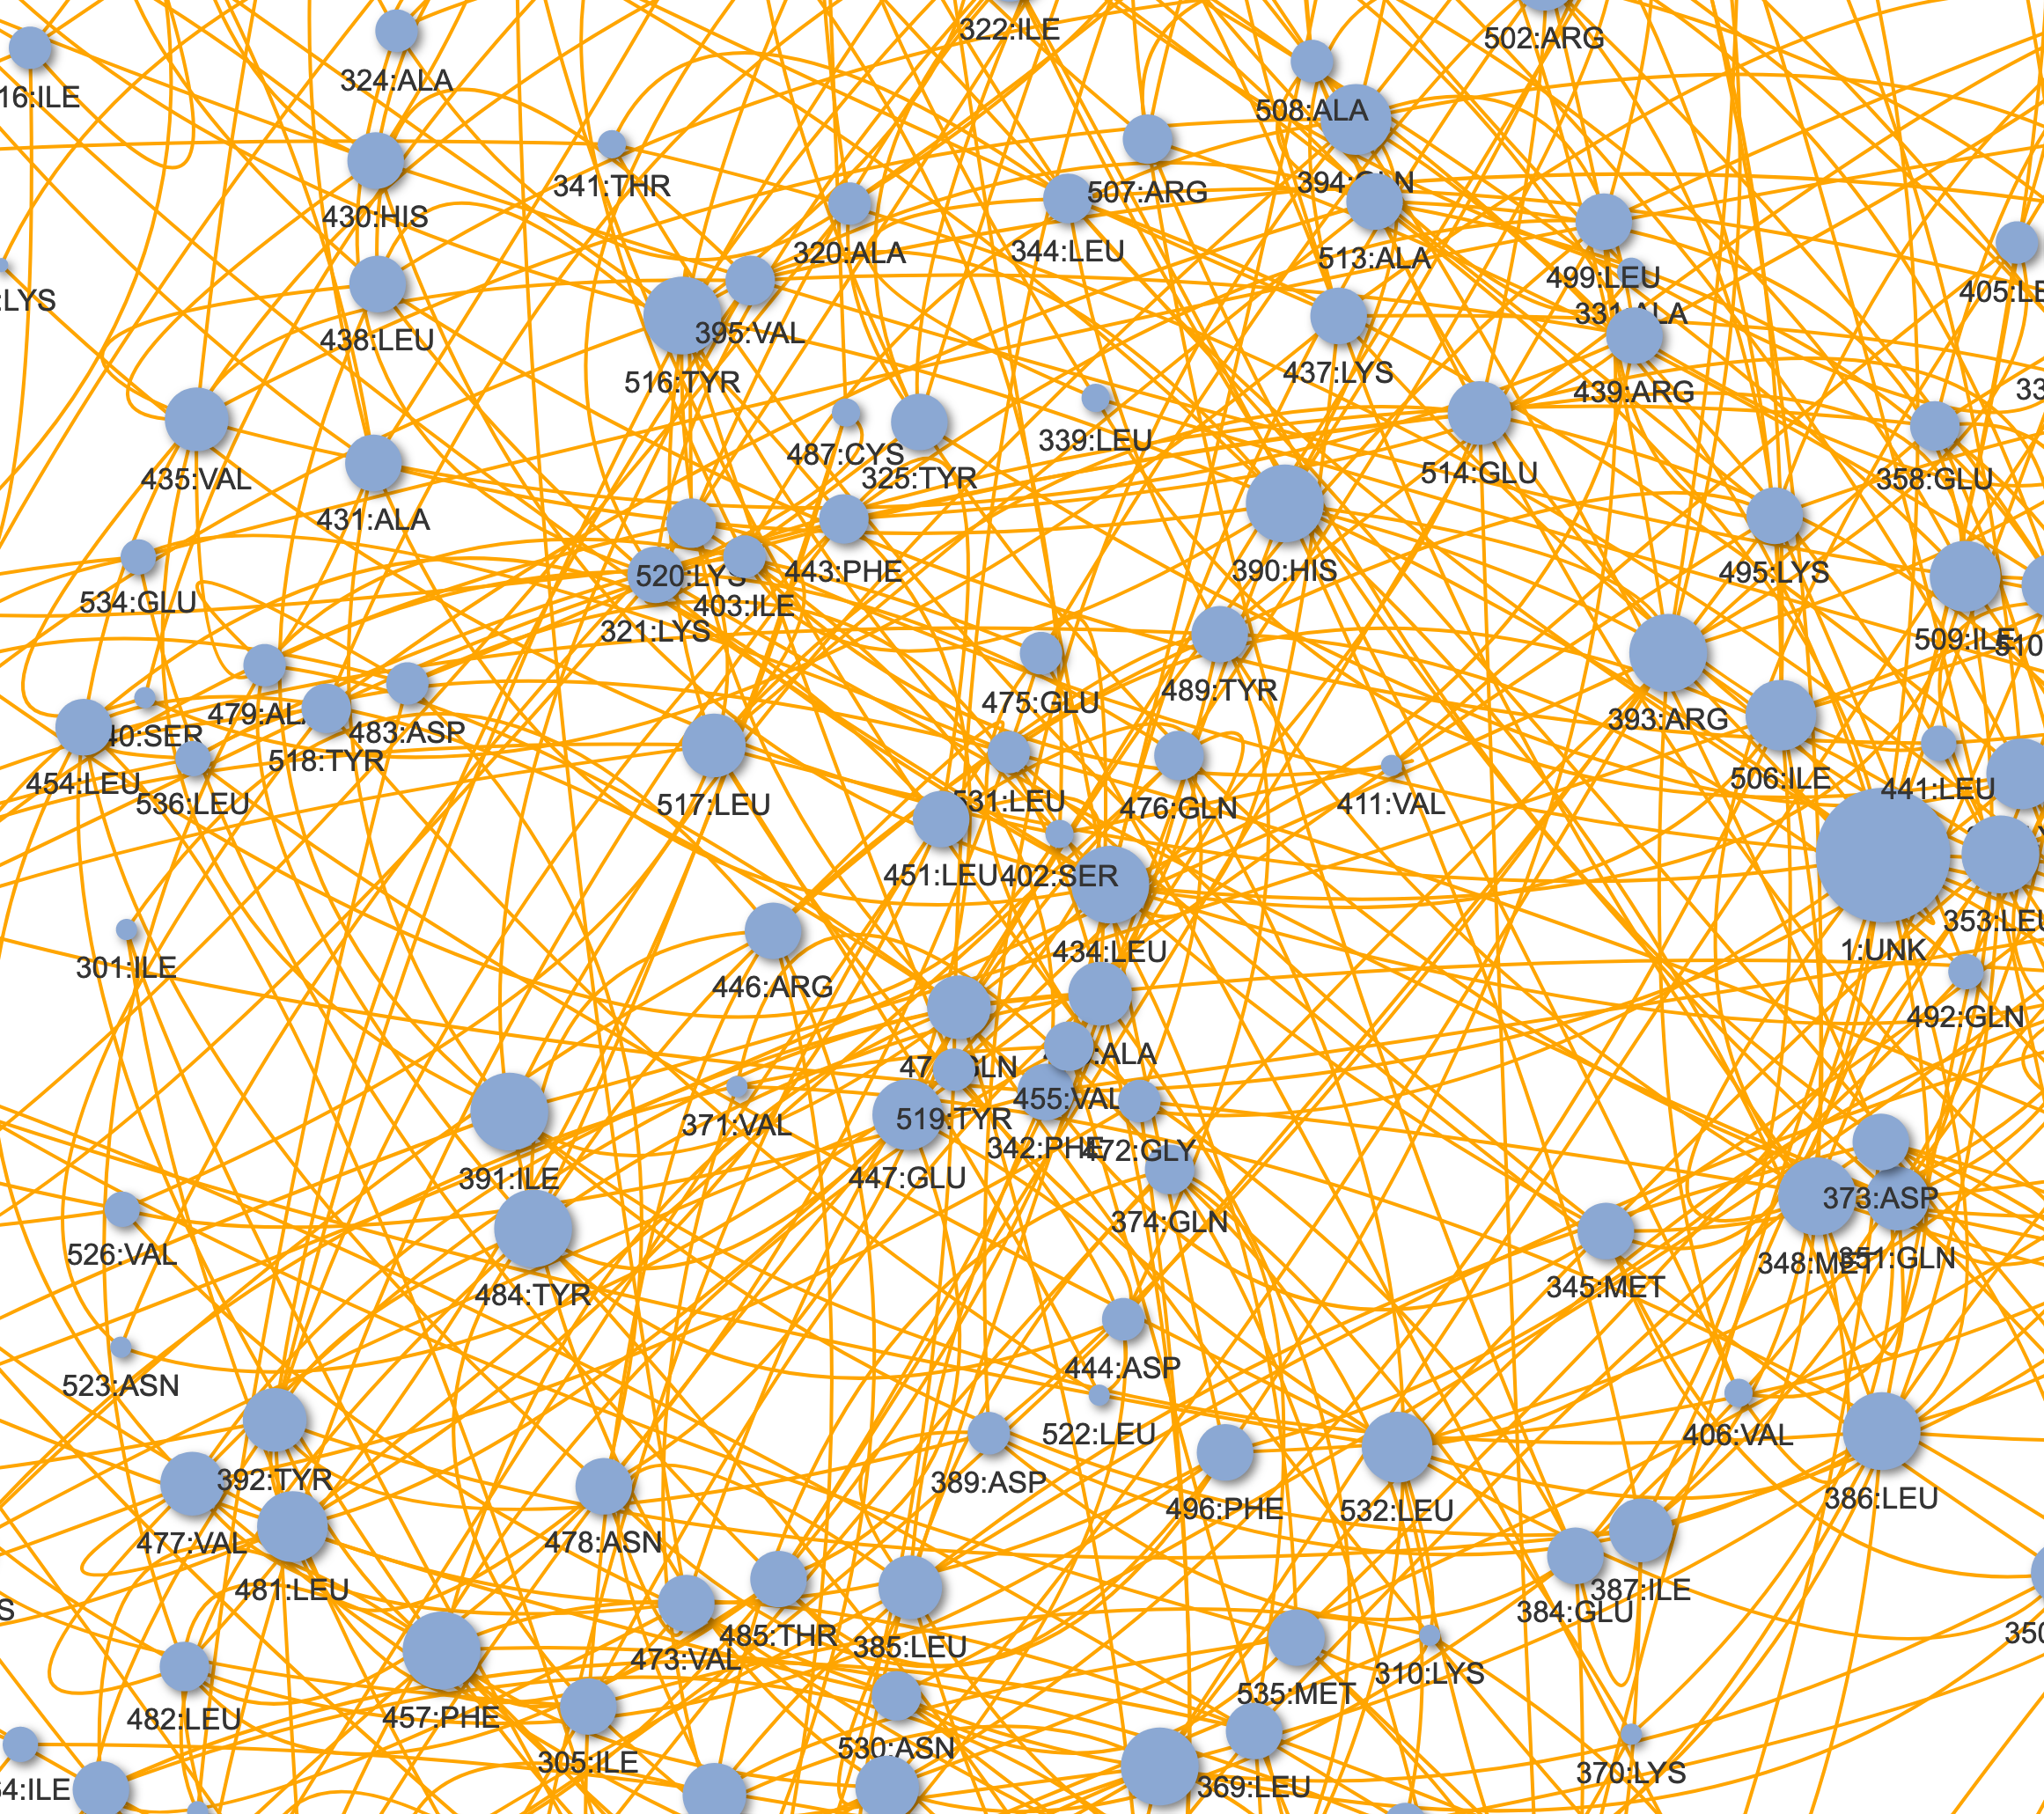